In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

### Data Sources

Bag-of-Words lyrics dataset was attained from http://millionsongdataset.com/musixmatch/

The specific file links are as follows

* Word Counts:
http://millionsongdataset.com/sites/default/files/AdditionalFiles/mxm_dataset_train.txt.zip
and
http://millionsongdataset.com/sites/default/files/AdditionalFiles/mxm_dataset_test.txt.zip

* Artist and Track information:
http://millionsongdataset.com/sites/default/files/AdditionalFiles/mxm_779k_matches.txt.zip

* Unstemmed words dictionary:
http://millionsongdataset.com/sites/default/files/mxm_reverse_mapping.txt


Genres data was attained from several sources

* Allmusic genre annotations: 
http://www.ifs.tuwien.ac.at/mir/msd/partitions/msd-MAGD-genreAssignment.cls

* Tagtraum majority/minority genre annotatins:
https://www.tagtraum.com/genres/msd_tagtraum_cd2.cls.zip

* Tagtrum unambiguous annotations (single genre):
https://www.tagtraum.com/genres/msd_tagtraum_cd2c.cls.zip


Full raw lyrics were scrapped from https://genius.com/ 



*Note: The following sections involve creating and saving several numpy and csv files by running class methods one-by-one. While these would ideally be done in one easy to run function, the memory requirements make that impractical. Files are saved along the way is so that I (and you!) can keep less of the data in memory at any one time*


### Load and process data

*data is stored in the data folder, but is not provided in this repo. To follow along, download the data from the links above to the data folder in your repo*

After data is downloaded into the data folder (with the default file names from the data sources), data can be processed with the Process_data class. There are four class methods that must be completed in the right order to create the files necessary for this project.

**1) Process_data.load_data()**

This method creates an info dataframe (**final_info.csv**) with artist/title/genre for all songs in the dataset, a numpy array of the counts of the top 5000 words for the songs in the info dataframe (**counts_data.npy**), a smaller version of the counts array with the top 1500 words (**counts_trimmed.npy**), and a list of words that serve as the columns for the counts data (**words.npy**). Running this method requires a lot of memory - your results might vary.

**2) Process_data.make_tfidf()**

This method creates a TF-IDF array from the counts_data array. The full TF-IDF is saved as **tfidf.npy**, and a smaller version with the top 1500 words is saved as **tfidf_trimmed.npy**

**3) Process_data.clean_counts()**

**4) Process_data.clean_tfidf()**

These two methods create dataframes from the trimmed counts and TF-IDF arrays, replace column headings with unstemmed (original text) versions of the words for nicer presentation, and remove stopword columns. This leaves us with two dataframes for our modeling and eda.

After these four methods have been run, the TF-IDF and counts dataframes can be loaded with **Process_data.load_tfidf()** and **Process_data.load_counts()**

In [2]:
from process_data import Process_data

In [3]:
Process_data.load_data()
Process_data.make_tfidf()
Process_data.clean_counts()
Process_data.clean_tfidf()

In [6]:
# Load the cleaned TF-IDF Dataframe with artists, titles, and genres
tf = Process_data.load_tfidf()

In [7]:
tf

,song_id,artist,title,genre,love,know,like,que,time,come,...,walkin',antes,même,chi,vois,hungry,wire,pocket,jamais,note
0,TRAADFO128F92E1E91,Asher D,In The House,Reggae,0.000000,2.612452,4.019406,0.000000,0.000000,2.371474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAAEJQ128F92C484E,Raheem Devaughn,Four Letter Word,RnB,15.457319,1.741635,0.000000,0.000000,10.943128,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAAGMC128F4292D0F,LITTLE TEXAS,My Love (Album Version),Country,39.747392,1.741635,0.000000,0.000000,0.000000,1.185737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAAHHW128F934134A,Azucar Moreno,Lujuria,Latin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAAIMO128F92EB778,The Alternate Routes,Ain't No Secret,Rock,5.520471,1.741635,6.029108,0.000000,1.094313,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101880,TRZZZEY128F93311FC,Eleanor McEvoy,All That Surrounds Me,Rock,0.000000,0.000000,1.004851,0.000000,1.094313,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101881,TRZZZRJ128F42819AF,Belle & Sebastian,Lord Anthony,Rock,0.000000,0.000000,0.000000,0.000000,0.000000,1.185737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101882,TRZZZUK128F92E3C60,Judee Sill,Lady-O,Folk,2.208188,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101883,TRZZZWS128F429CF87,Los Prisioneros,Que No Destrocen Tu Vida,Latin,0.000000,0.000000,0.000000,17.268855,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This TF-IDF dataframe will be great for regression models and random forest, but it will not be useful for deep learning models like LSTM. For LSTM, I need the actual lyrics in their original structure. My data source (http://millionsongdataset.com/musixmatch/) does not contain the original lyrics. This may seem backwards given that I already have vectorized lyrics, but I will try to scrape the original lyrics for these songs. 

### Scraping raw lyrics for LSTM

Lyrics can be scraped quite easily from Genius.com. The urls have a very standardized structure. For example, the url for Taylor Swift - Willow is 'https://genius.com/Taylor-swift-willow-lyrics'. Based on this structure, we can use the artist and title fields from our dataframe to construct our best guesses at urls for every song in the dataset.  

In [6]:
# Loading the track info dataframe
info = pd.read_csv('data/final_info.csv')
info

,song_id,artist,title,genre
0,TRAADFO128F92E1E91,Asher D,In The House,Reggae
1,TRAAEJQ128F92C484E,Raheem Devaughn,Four Letter Word,RnB
2,TRAAGMC128F4292D0F,LITTLE TEXAS,My Love (Album Version),Country
3,TRAAHHW128F934134A,Azucar Moreno,Lujuria,Latin
4,TRAAIMO128F92EB778,The Alternate Routes,Ain't No Secret,Rock
...,...,...,...,...
101880,TRZZZEY128F93311FC,Eleanor McEvoy,All That Surrounds Me,Rock
101881,TRZZZRJ128F42819AF,Belle & Sebastian,Lord Anthony,Rock
101882,TRZZZUK128F92E3C60,Judee Sill,Lady-O,Folk
101883,TRZZZWS128F429CF87,Los Prisioneros,Que No Destrocen Tu Vida,Latin


In [7]:
# Constructing a URL column from the existing artist and title information
info['url'] = 'https://genius.com/' + (info.artist.str.replace(' ','-').str.capitalize().str.replace("'", "") + 
             '-' + info.title.str.replace(' ','-').str.lower().str.replace("'", "") 
             + '-lyrics').str.replace('.','').str.replace('&','and')

# Of course these URLs will not all be perfect, but we are starting with 100,000+ songs, 
# so as long as we can get a reasonably high percentage, we will still have a good dataset.


In [8]:
# Make HTTP requests
import requests
# Scrape data from an HTML document
from bs4 import BeautifulSoup
# I/O
import os
# Search and manipulate strings
import re

In [9]:
# Function to scrape song lyrics from a Genius.com url
# And do some initial processing of the lyrics
def scrape_song_lyrics(url):
    # We don't want the function to stop when it hits a bad URL - there will be many!
    
    try:
        page = requests.get(url)
        html = BeautifulSoup(page.text, 'html.parser')
        lyrics = html.find('div', class_='lyrics').get_text()
        #remove identifiers like chorus, verse, etc
        lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)
        #remove empty lines
        lyrics = os.linesep.join([s for s in lyrics.splitlines() if s])
        lyrics = lyrics.replace('\n', ' ')
        return lyrics
    # When the URL doesn't work, return 'not found'
    except:
        return 'not found'

In [12]:
# Example output of the above function:
scrape_song_lyrics('https://genius.com/Taylor-swift-willow-lyrics')[0:500]

"I'm like the water when your ship rolled in that night Rough on the surface, but you cut through like a knife And if it was an open-shut case I never would've known from that look on your face Lost in your current like a priceless wine The more that you say, the less I know Wherever you stray, I follow I'm begging for you to take my hand Wreck my plans, that's my man Life was a willow and it bent right to your wind Head on the pillow, I could feel you sneakin' in As if you were a mythical thing "

In [51]:
# This line of code will scrape the lyrics for every song in the dataframe:

#info['lyrics'] = info.url.apply(scrape_song_lyrics)

# However... it will take about 16 hours because each request is slow


Instead of scraping the lyrics for all 100,000 songs in one line of code, I have written 10 python files (**scrape1.py** - **scrape10.py**) that each scrape 10,000 songs and save them to a csv. The task requires very little processing power, so I can run all 10 files at one time. This reduces the time to a few hours. The scraped lyrics csvs are supplied in the data folder so you do not need to scrape to follow along. 

In [13]:
# Load the 10 scraped lyrics files into one dataframe
for i in range(1,11):
    if i == 1:
        df = pd.read_csv(f'data/lyrics{i}.csv')
    else:
        df2= pd.read_csv(f'data/lyrics{i}.csv')
        df = pd.concat([df,df2],axis=0)
        
df.set_index('Unnamed: 0',inplace=True)
df.index.name=None

In [14]:
# Now we have a dataframe with the raw text lyrics!
df

,song_id,artist,title,genre,url,lyrics
0,TRAADFO128F92E1E91,Asher D,In The House,Reggae,https://genius.com/Asher-d-in-the-house-lyrics,not found
1,TRAAEJQ128F92C484E,Raheem Devaughn,Four Letter Word,RnB,https://genius.com/Raheem-devaughn-four-letter...,I taste sweet melodies Every time I kiss you I...
2,TRAAGMC128F4292D0F,LITTLE TEXAS,My Love (Album Version),Country,https://genius.com/Little-texas-my-love-(album...,not found
3,TRAAHHW128F934134A,Azucar Moreno,Lujuria,Latin,https://genius.com/Azucar-moreno-lujuria-lyrics,Porque yo vivo pensando en ti Y voy muriendo p...
4,TRAAIMO128F92EB778,The Alternate Routes,Ain't No Secret,Rock,https://genius.com/The-alternate-routes-aint-n...,I'd stick around if you tell me I'm yours But ...
...,...,...,...,...,...,...
101880,TRZZZEY128F93311FC,Eleanor McEvoy,All That Surrounds Me,Rock,https://genius.com/Eleanor-mcevoy-all-that-sur...,Smells of toast and coffee served to put in mi...
101881,TRZZZRJ128F42819AF,Belle & Sebastian,Lord Anthony,Rock,https://genius.com/Belle-and-sebastian-lord-an...,"Anthony, bullied at school Get your own back, ..."
101882,TRZZZUK128F92E3C60,Judee Sill,Lady-O,Folk,https://genius.com/Judee-sill-lady-o-lyrics,While you sit and seek A crescent moon is layi...
101883,TRZZZWS128F429CF87,Los Prisioneros,Que No Destrocen Tu Vida,Latin,https://genius.com/Los-prisioneros-que-no-dest...,¿Cómo empezar? Son tus padres y amigos Quieren...


In [15]:
#remove irrelevant rows

# Remove rows where lyrics weren't found (URL was bad)
df.drop(df[df['lyrics'] == 'not found'].index,inplace=True)
# Remove rows with NaN for lyrics (found webpage for lyrics but there was no content)
df.drop(df[df['lyrics'].isna()].index,inplace=True)
# Remove rows where lyrics are fewer than 20 characters
# This takes care of the rows that say things like "Instrumental"
df.drop(df[df['lyrics'].map(len) < 20].index,inplace=True)
# Remove rows that have the following error message from the lyrics source
df.drop(df[df['lyrics'] == '                       Lyrics for this song have yet to be released. Please check back once the song has been released.                    '].index,inplace=True)



Upon my initial analysis, I realized that including multiple languages in the dataset could complicate things. For example, there is a lot of german rap music, so when I looked at the songs most strongly identified as rap songs by my model, they were all german! While this is absolutely an interesting finding, it is not quite what I am looking for in this project. I decided to limit the scope to just english language songs, which I handle below using langdetect.

In [ ]:
from langdetect import detect

# Detect language of lyrics
df['lang'] = df.lyrics.apply(detect)

# Remove all rows where lyrics are not in english 
df.drop(df[df.lang != 'en'].index,inplace=True)

# Remove the World and Latin genres. These genres simply do not make much sense to include
# now that I am limiting myself to english lyrics
df.drop(df[df.genre == 'World'].index,inplace=True)
df.drop(df[df.genre == 'Latin'].index,inplace=True)

In [29]:
# Save my indicies in a variable before I reset them
# So that I can use these indicies to select the same rows in my TF-IDF and counts dataframes
final_indicies = df.index
#np.save('data/final_indicies.npy',final_indicies)
df.reset_index(drop=True, inplace=True)

In [30]:
# Save the lyrics dataframe
#df.to_csv('data/final_lyrics_df.csv',index=False)

## Exploratory Data Analysis
Now we have 3 datasets to work with for our EDA and modeling. 

1) Word Counts - DataFrame with the counts of the top 1382 words

2) TF-IDF - DataFrame with TF-IDF score for the top 1382 words

3) Raw Lyrics - Dataframe with the lyrics as a string


Each will be useful for different applications. Word counts can provide interesting EDA and visualizations of genres. TF-IDF will be useful for regression models and random forest. Raw lyrics will be useful for LSTM. 

In [35]:
# Load the counts dataframe
cts = pd.read_csv('data/counts_df.csv')
# Load the indicies from the raw lyrics dataframe
final_indicies = np.load('data/final_indicies.npy')
# Limit the counts dataframe to just the rows that are also present in the full lyrics dataframe
cts = cts.iloc[final_indicies]
cts

,song_id,artist,title,genre,love,know,like,que,time,come,...,walkin',antes,même,chi,vois,hungry,wire,pocket,jamais,note
1,TRAAEJQ128F92C484E,Raheem Devaughn,Four Letter Word,RnB,14.0,2.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAAIMO128F92EB778,The Alternate Routes,Ain't No Secret,Rock,5.0,2.0,6.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,TRAAIQG128F425204F,Orson,The Contortionist,Rock,1.0,3.0,0.0,0.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,TRAAKMD128F1497E6C,Okkervil River,A Favor,Rock,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,TRAANWA128F426ADF0,Ghostface Killah,Assassination Day,Rap,0.0,0.0,13.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101879,TRZZZCL128F428BB80,I Am Ghost,The Ship of Pills and Needed Things,Rock,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101880,TRZZZEY128F93311FC,Eleanor McEvoy,All That Surrounds Me,Rock,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101881,TRZZZRJ128F42819AF,Belle & Sebastian,Lord Anthony,Rock,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101882,TRZZZUK128F92E3C60,Judee Sill,Lady-O,Folk,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### What is the distribution of our data?

Rock          33064
Country        5940
Metal          5758
Pop            5325
RnB            4563
Rap            4261
Electronic     3418
Folk           2122
Punk           1866
Reggae         1490
Jazz           1280
Blues          1093
New Age          93
Name: genre, dtype: int64


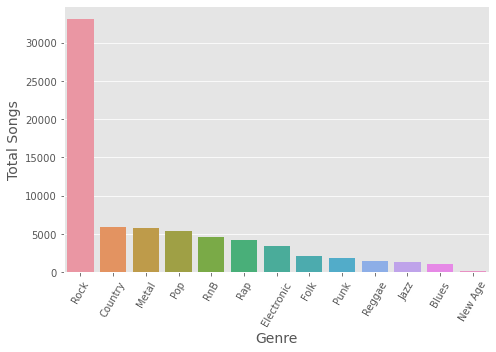

In [36]:
dist = cts.genre.value_counts()
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=dist.index,y=dist,ax=ax)
ax.set_xlabel('Genre',fontsize=14)
plt.xticks(rotation='60')
ax.set_ylabel('Total Songs',fontsize=14)
fig.tight_layout()
fig.savefig('figs/distribution.png')
print(dist)

The classes are very unbalanced. There are far more rock songs than any other genre. This will have to be accounted for during the modeling section. There are very few songs in the New Age class, so it is probably best to drop this class:

In [41]:
cts = cts[cts.genre != 'New Age']

### Which genres have the largest vocabulary?

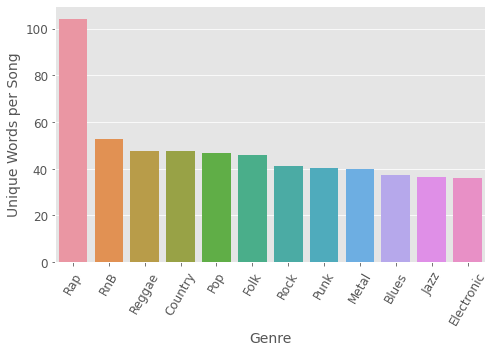

In [43]:
# Calculate the number of unique words for each song
unique = cts.iloc[:,0:4]
unique['unique_words'] = (cts.iloc[:,4:]>0).sum(axis=1)

import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

# Plot the average number of unique words per song for each genre
avgs = unique.groupby('genre').mean().sort_values(by='unique_words',ascending=False)

fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x=avgs.index,y=avgs['unique_words'],ax=ax)
ax.set_xlabel('Genre',fontsize=14)
plt.xticks(rotation='60')
ax.set_ylabel('Unique Words per Song',fontsize=14)
fig.tight_layout()
fig.savefig('figs/unique_words_per_genre.png')


We can see that rap is far and away the genre with the largest vocabulary. This makes intuitive sense - most pop/rock/country songs have fairly repetative choruses and verses with just a few lines, where rap songs are by their nature very lyrically diverse. 

### Which genres are most lyrically repetitive?


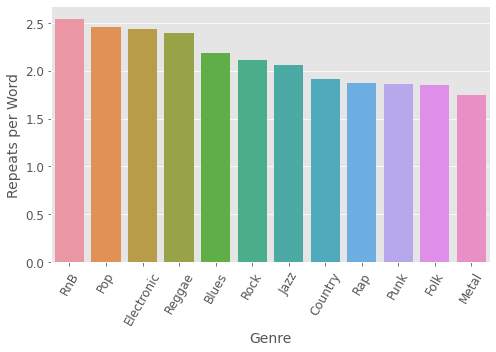

In [44]:
# Calculate number of repeats per word per song
#  total words/unique words
unique['total_words'] = cts.iloc[:,4:].sum(axis=1)
unique['repeats'] = unique['total_words']/unique['unique_words']

avgs = unique.groupby('genre').mean().sort_values(by='repeats',ascending=False)

fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x=avgs.index,y=avgs['repeats'],ax=ax)
ax.set_xlabel('Genre',fontsize=14)
plt.xticks(rotation='60')
ax.set_ylabel('Repeats per Word',fontsize=14)
fig.tight_layout()
fig.savefig('figs/repeats_per_word.png')

RnB is the most repetitive genre on a per word basis. Each word is repeated on average 2.5 times. Metal is the least repetative, with about 1.7 repeats per word. However, this measure doesn't quite capture what I think of as repetitive - a single word or phrase being repeated over and over again. Instead, lets look at the number of repeats for the most used word in each song.

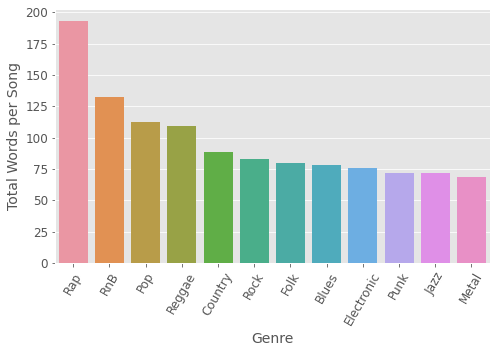

In [45]:
avgs = unique.groupby('genre').mean().sort_values(by='total_words',ascending=False)
fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x=avgs.index,y=avgs['total_words'],ax=ax)
ax.set_xlabel('Genre',fontsize=14)
plt.xticks(rotation='60')
ax.set_ylabel('Total Words per Song',fontsize=14)
fig.tight_layout()
fig.savefig('figs/words_per_song.png')

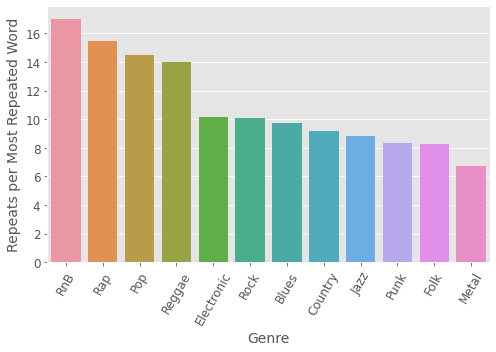

In [46]:
unique['max'] = cts.iloc[:,4:].max(axis = 1)
avgs = unique.groupby('genre').mean().sort_values(by='max',ascending=False)

fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x=avgs.index,y=avgs['max'],ax=ax)
ax.set_xlabel('Genre',fontsize=14)
plt.xticks(rotation='60')
ax.set_ylabel('Repeats per Most Repeated Word',fontsize=14)
fig.tight_layout()
fig.savefig('figs/most_repeated.png')


On this measure, RnB remains the most repetitive, but Rap has climbed way up to number 2. This may be unfiar, because there are so many more total words in rap songs. Lets normalized to the total number of words per song.

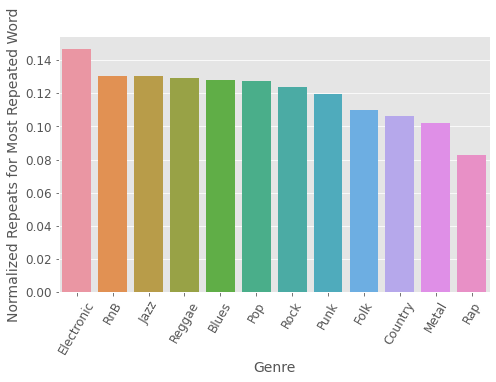

In [47]:
avg_tot = unique['total_words'].mean()
unique['norm_max'] = unique['max']/unique['total_words']
avgs = unique.groupby('genre').mean().sort_values(by='norm_max',ascending=False)


fig,ax = plt.subplots(figsize=(7,5))
sns.barplot(x=avgs.index,y=avgs['norm_max'],ax=ax)
ax.set_xlabel('Genre',fontsize=14)
plt.xticks(rotation='60')
ax.set_ylabel('Normalized Repeats for Most Repeated Word',fontsize=14)
fig.tight_layout()

This measure aligns much better with what I think of as repetitive. I think we have all heard Electronic songs that seem to just repeat the same words over and over agian. 

### What sorts of words are used in different genres?
#### Genreating WordClouds

There are a lot of generic words that are popular in many songs across every genre. If I just use the word counts to generate word clouds, I suspect that I will get very similiar clouds for most genres. To correct for this somewhat, I will instead use the TF-IDF data to generate word clouds. This should find words that are more unique.

In [10]:
tf = pd.read_csv('data/tfidf_df.csv')
final_indicies = np.load('data/final_indicies.npy')
tf = tf.iloc[final_indicies]

# Drop New Age like we did for counts above
tf = tf[tf.genre != 'New Age']

In [3]:
tf_sum = tf.groupby('genre').sum()

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
def generate_word_cloud(genre, ax):
    words = []
    for word in tf_sum.columns:
        words += ([word]*int(tf_sum.loc[genre,word]))
    words = ' '.join(words)


    wordcloud = WordCloud(
    width = 3000,
    height = 2000, collocations=False,
    background_color = 'white', max_words = 100).generate(words)
    # Display the generated image:
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")

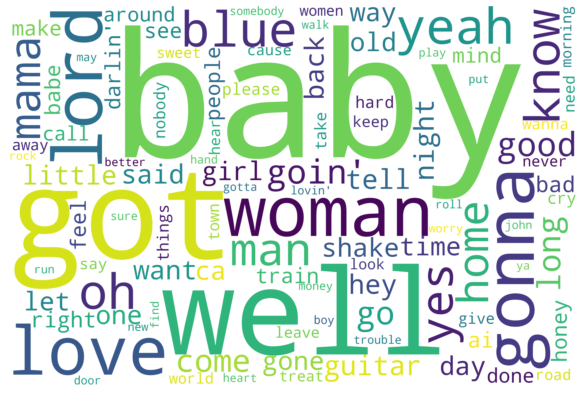

In [6]:
fig,ax = plt.subplots(figsize=(11,7))
generate_word_cloud('Blues',ax)
#fig.savefig('figs/cloud_blues.png')

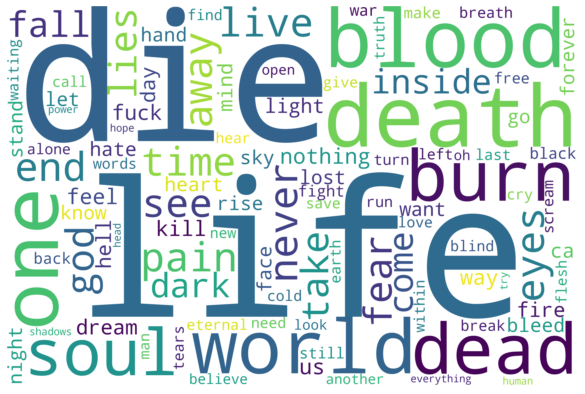

In [127]:
fig,ax = plt.subplots(figsize=(11,7))
generate_word_cloud('Metal',ax)
fig.savefig('figs/cloud_metal.png')

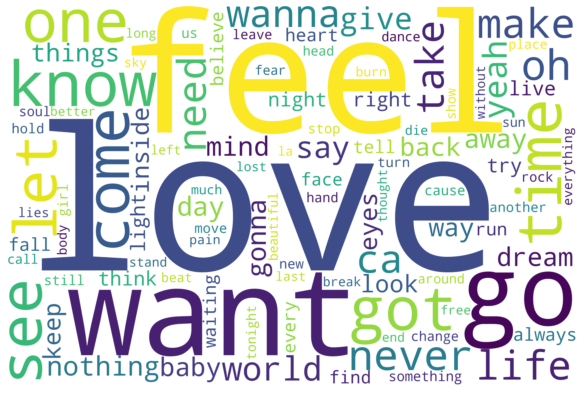

In [128]:
fig,ax = plt.subplots(figsize=(11,7))
generate_word_cloud('Electronic',ax)
fig.savefig('figs/cloud_electronic.png')

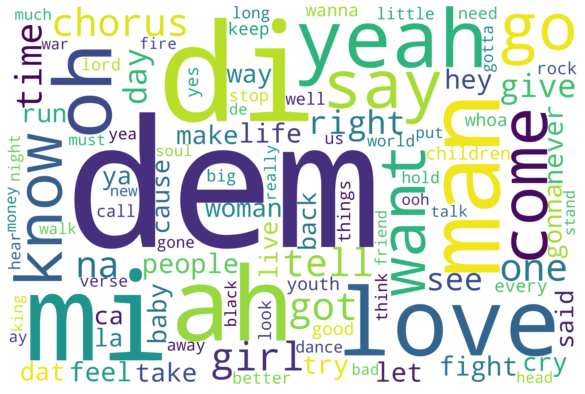

In [129]:
fig,ax = plt.subplots(figsize=(11,7))
generate_word_cloud('Reggae',ax)
fig.savefig('figs/cloud_reggae.png')

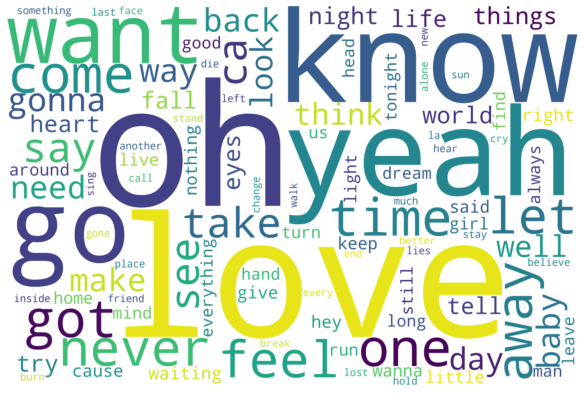

In [131]:
fig,ax = plt.subplots(figsize=(11,7))
generate_word_cloud('Rock',ax)
fig.savefig('figs/cloud_rock.png')

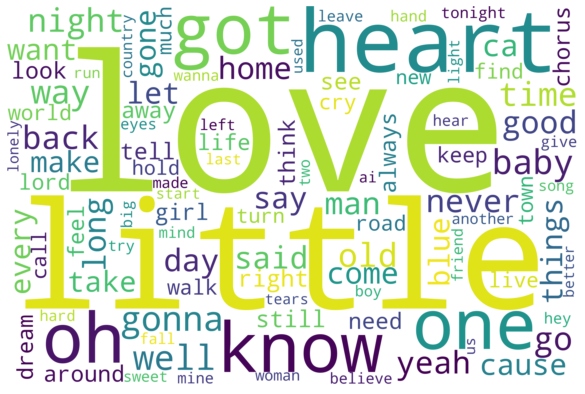

In [134]:
fig,ax = plt.subplots(figsize=(11,7))
generate_word_cloud('Country',ax)

Just looking at the wordclouds, we can see that predicting genres might be somewhat tough. While genres like reggae and metal seem pretty unique, the other genres are harder to tell apart.

## Modeling

In [11]:
X = np.array(tf.iloc[:,4:])
y = tf[['artist','title','genre']]
feat = tf.columns[4:]

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

In [13]:
# Initial train test split. Test sets will be the final validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y['genre'])

In [61]:
# Creating a KFolds object to use for cross validation throughout
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 6, random_state = 17, shuffle=True)

In [54]:
# Function to test a model:

def test_model(model,kf,X, y,prnt=True):
    #empty lists for error scores, yhats from each fold, and y_tests from each fold
    acc_scores = []
    yhats = []
    y_tests = []
    
    # looping through the different splits
    for train_index, test_index in kf.split(X,y):
        # getting train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        

        # fitting the model and predicting y-values
        model.fit(X_train,y_train)
        yhat = model.predict(X_test)

        # using our RMSE function to test the model
        acc_scores.append(accuracy_score(yhat,y_test))
        
        # appending yhat and y_test to lists for use outside the function
        yhats.append(yhat)
        y_tests.append(y_test)
        
        # print error score and return yhats and y_tests (for residual plots, etc.)
    if prnt:
        print(f'Accuracy Score: {np.mean(acc_scores)}')
    else:
        return acc_scores, yhats, y_tests

In [44]:
# Creating my baseline model as a class so that it can be used in the same cross validation function above
class Baseline:
    def __init__(self, majority = False):
        self.probs = None
        self.yhat = None
        self.X = None
        self.y = None
        self.majority = majority
        
    # fit method: store X and y, and get the proportions for all genres
    def fit(self, X,y):
        self.X = X
        self.y = y
        
        # store the proportions for all genres
        self.probs = self.y.value_counts()/len(self.y)
        
    # Make a prediction
    def predict(self, y_test):
        self.yhat = []
        
        # if 'majority' then always choose majority class
        if self.majority:
            for _ in range(len(y_test)):
                self.yhat.append(probs.index[0])
        
        # if not majority then choose a random class with proportional probability
        else:
            for _ in range(len(y_test)):
                self.yhat.append(np.random.choice(self.probs.index,p=self.probs))
            
            
        return self.yhat

In [55]:
# Testing proportional baseline model with my model testing function
model = Baseline()
test_model(model,kf,X_train,y_train['genre'])

Accuracy Score: 0.2502136333243288


In [56]:
# Testing always majority baseline model
model = Baseline(majority = True)
test_model(model,kf,X_train,y_train['genre'])

Accuracy Score: 0.4711278134843388


In [88]:
# Balanced Classes RF
RF = RandomForestClassifier(class_weight='balanced', n_jobs=6,n_estimators=300)

In [89]:
test_model(RF, kf, X_train, y_train['genre'])

Accuracy Score: 0.5429074417738508


In [112]:
train_idx, test_idx = list(kf.split(X_train,y_train['genre']))[3]

RF.fit(X_train[train_idx],y_train.iloc[train_idx,2])

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=6)

In [113]:
yhat = RF.predict(X_train[test_idx])

In [114]:
print(classification_report(y_train.iloc[test_idx,2],yhat))

              precision    recall  f1-score   support

       Blues       0.50      0.02      0.04       145
     Country       0.63      0.04      0.07       792
  Electronic       0.24      0.01      0.02       455
        Folk       0.43      0.02      0.04       283
        Jazz       0.55      0.11      0.18       171
       Metal       0.73      0.21      0.32       768
         Pop       0.46      0.02      0.03       710
        Punk       0.20      0.00      0.01       249
         Rap       0.80      0.74      0.77       568
      Reggae       0.94      0.17      0.29       199
         RnB       0.62      0.14      0.23       609
        Rock       0.52      0.98      0.68      4408

    accuracy                           0.54      9357
   macro avg       0.55      0.20      0.22      9357
weighted avg       0.55      0.54      0.43      9357



In [93]:
idx = (RF.feature_importances_*-1).argsort()[0:20]

In [97]:
top_feats = list(feat[idx])

In [99]:
top_feats[14] = 'f***'

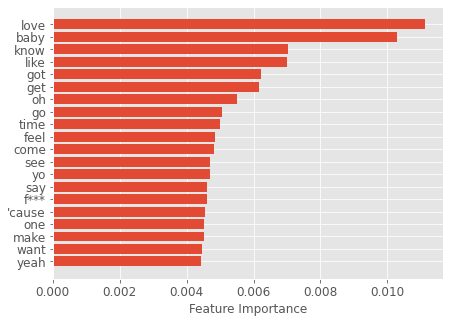

In [111]:
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig,ax = plt.subplots(figsize=(7,5))
ax.barh(top_feats,RF.feature_importances_[idx])
ax.invert_yaxis()
ax.set_xlabel('Feature Importance')
fig.savefig('figs/rf_feature_importance.png')

In [66]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

In [67]:

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 

    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text


In [68]:
df['clean_lyrics'] = df['lyrics'].apply(clean_text)

In [69]:
# Calculate the mean number of words per song - important for setting a reasonable max length
lengths = df['clean_lyrics'].apply(lambda x: x.split(' ')).apply(lambda x: len(x))
np.mean(lengths)

119.00099595925104

In [91]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 175
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean_lyrics'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 113777 unique tokens.


In [92]:
X = tokenizer.texts_to_sequences(df['clean_lyrics'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (70284, 175)


In [93]:
dum = pd.get_dummies(df['genre'])
y = dum.values
labels = dum.columns
print('Shape of label tensor:', y.shape)

Shape of label tensor: (70284, 13)


In [94]:
# Train test split. Also splitting the original dataframe so that I can easily access meta data about songs
X_train,X_test,y_train,y_test,df_train,df_test = train_test_split(X,y,df, stratify=y, test_size = 0.2,random_state=13)

In [95]:
# Building LSTM model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 4
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/4
791/791 [==============================] - 107s 133ms/step - loss: 1.8652 - accuracy: 0.4738 - val_loss: 1.6253 - val_accuracy: 0.5102
Epoch 2/4
791/791 [==============================] - 105s 133ms/step - loss: 1.5085 - accuracy: 0.5464 - val_loss: 1.5126 - val_accuracy: 0.5465
Epoch 3/4
791/791 [==============================] - 105s 133ms/step - loss: 1.3149 - accuracy: 0.6006 - val_loss: 1.4611 - val_accuracy: 0.5607
Epoch 4/4
791/791 [==============================] - 105s 133ms/step - loss: 1.1430 - accuracy: 0.6480 - val_loss: 1.4546 - val_accuracy: 0.5563


In [96]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

440/440 [==============================] - 6s 15ms/step - loss: 1.4331 - accuracy: 0.5696
Test set
  Loss: 1.433
  Accuracy: 0.570


In [108]:
model.save_weights('models/LSTM_checkpoint')

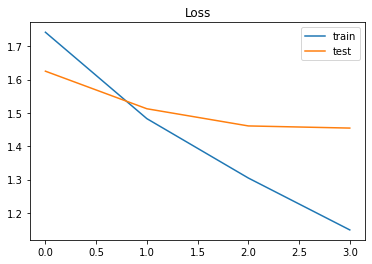

In [109]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

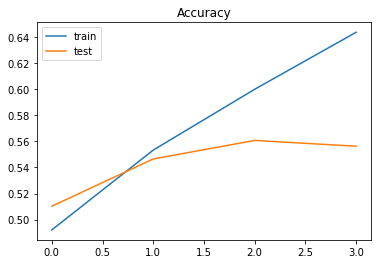

In [110]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [99]:
preds = model.predict(X_test)

In [100]:
def print_top_preds(genre, n):
    idx = np.argwhere(labels==genre)[0][0]
    top_idxs = (preds[:,idx]*-1).argsort()
    data = df_test.iloc[top_idxs]
    for i in range(0,n):
        print(f'Artist: {data.iloc[i,1]}')
        print(f'Track: {data.iloc[i,2]}')
        print(f'Real label: {data.iloc[i,3]}')
        print(f'Probability {genre}: {int(preds[top_idxs[i],idx]*100)}%')
        print(f'\n{data.iloc[i,5]}')
        print('\n')

In [101]:
print_top_preds('Rap',3)

Artist: Roots Manuva
Track: Too Cold
Real label: Rap
Probability Rap: 99%

I'm too cold, I'm too cold, I'm too cold I'm too old, I'm too old, I'm too old And it shows, and it shows, and it shows – And you know, and you know, and you know Sometimes I hate myself; sometimes I love myself Sometimes I hate myself; sometimes I love myself Ah wh’ the fuck, man? We can't stay bruk, man We never stuck, man We on the up, man I do my nut, man Puke up my gut, man I'm a such and such, man I don't know much, man I pay my dues, man Now I'm confused, man: Scabby vampires wanna run, come along come use man The same old news, man We bring the blues, man My baby left me because I wouldn't buy new shoes, man We win or lose, man Don't ask me for a twos, man Buy your own fags, man Mind you get stabbed man Don't you see that we some big broad bad man Born and bred in this ‘ere big broad bad land Known all over the world as a mad man Life is hard but it's just too bad man Sometimes I hate myself. sometimes I

In [111]:
pred_genres = labels[preds.argmax(axis=1)]
true_labels = df_test.genre
print(classification_report(true_labels,pred_genres))

              precision    recall  f1-score   support

       Blues       0.28      0.07      0.12       219
     Country       0.46      0.45      0.45      1188
  Electronic       0.16      0.01      0.03       684
        Folk       0.29      0.04      0.06       425
        Jazz       0.25      0.03      0.05       256
       Metal       0.60      0.52      0.56      1152
     New Age       0.00      0.00      0.00        19
         Pop       0.31      0.12      0.17      1065
        Punk       0.18      0.03      0.05       373
         Rap       0.82      0.75      0.78       852
      Reggae       0.81      0.07      0.13       298
         RnB       0.40      0.43      0.41       913
        Rock       0.60      0.85      0.70      6613

    accuracy                           0.57     14057
   macro avg       0.40      0.26      0.27     14057
weighted avg       0.52      0.57      0.51     14057



In [112]:
# Make HTTP requests
import requests
# Scrape data from an HTML document
from bs4 import BeautifulSoup
# I/O
import os
# Search and manipulate strings
import re
import pandas as pd

def scrape_song_lyrics(url):
    try:
        page = requests.get(url)
        html = BeautifulSoup(page.text, 'html.parser')
        lyrics = html.find('div', class_='lyrics').get_text()
        #remove identifiers like chorus, verse, etc
        lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)
        #remove empty lines
        lyrics = os.linesep.join([s for s in lyrics.splitlines() if s])
        lyrics = lyrics.replace('\n', ' ')
        return lyrics
    except:
        return 'not found'


In [115]:
URL = 'https://genius.com/Operation-ivy-knowledge-lyrics'
scrape_song_lyrics(URL)

"I know things are getting tougher When you can't get the top off the bottom of the barrel Wide open road of my future now It's looking fucking narrow All I know is that I don't know All I know is that I don't know nothing All I know is that I don't know All I know is that I don't know nothing We get told to decide Just like, as if, I'm not gonna change my mind All I know is that I don't know All I know is that I don't know nothing All I know is that I don't know All I know is that I don't know nothing What'cha gonna do with yourself? Boy, better make up your mind What'cha gonna do with yourself, boy? You're running out of time This time I got it all figured out All I know is that I don't know All I know is that I don't know nothing All I know is that I don't know All I know is that I don't know nothing All I know is that I don't know All I know is that I don't know nothing All I know is that I don't, don't know All I know is that I don't know nothing And that's fine"

In [116]:
new_song =[scrape_song_lyrics(URL)]
seq = tokenizer.texts_to_sequences(new_song)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
print(labels[np.argmax(pred)],f'{int(pred[0,np.argmax(pred)]*100)}%')

Rap 61%


It seems that modeling genre from lyrics is no simple task. This is makes some degree of sense given the subjective and nebulous nature of music genres. Songs in any genre can be about any topic, and most genres simply are not that unique in terms of lyrical content. 

Perhaps a more useful classification task would be using unsupervised learning to model the topics in different songs. Lets give it a shot!

In [10]:
from sklearn.decomposition import NMF

In [11]:
tf.reset_index(drop=True,inplace=True)

In [13]:
X.shape

(70273, 1382)

In [20]:
nmf = NMF(n_components = 5, max_iter = 1000)
nmf.fit(X)
W = nmf.transform(X)
H = nmf.components_
error = nmf.reconstruction_err_

In [21]:
for row in H:
    top = (-1 * row).argsort()
    topwords = feat[top]
    print(topwords[:5])
    print(topwords[5:10])
    print(topwords[10:15],"\n")

Index(['love', 'baby', 'get', 'oh', 'yeah'], dtype='object')
Index(['got', 'like', 'know', 'nigga', 'let'], dtype='object')
Index(['go', 'wanna', 'gonna', 'want', 'come'], dtype='object') 

Index(['na', 'hey', 'ooh', 'put', 'family'], dtype='object')
Index(['wanna', 'girl', 'good', 'oh', ''cos'], dtype='object')
Index(['yeah', 'jump', 'give', 'gonna', 'whoa'], dtype='object') 

Index(['la', 'oh', 'ooh', 'yeah', 'love'], dtype='object')
Index(['sing', 'club', 'desert', 'kids', 'se'], dtype='object')
Index(['hey', 'children', 'walkin'', 'come', 'people'], dtype='object') 

Index(['ba', 'ooh', 'boom', 'drunk', 'pretty'], dtype='object')
Index(['pa', 'doo', 'alright', 'girl', 'morning'], dtype='object')
Index(['oh', 'yeah', 'baby', 'goes', 'feel'], dtype='object') 

Index(['da', 'nigga', 'di', 'dem', 'niggaz'], dtype='object')
Index(['dat', 'ha', 'doo', 'yo', 'oh'], dtype='object')
Index(['fuck', 'bitch', 'wit', 'daddy', 'like'], dtype='object') 



In [32]:
df['lyrics']

0        I taste sweet melodies Every time I kiss you I...
1        I'd stick around if you tell me I'm yours But ...
2        Call me Kevin, Chris or Johnny, George Whateve...
3        Rapt in Star Wars sheets With my hand across y...
4        "There's no coke What? You heard me you dumb f...
                               ...                        
70273    Die by the sword And the millions have taken a...
70274    Smells of toast and coffee served to put in mi...
70275    Anthony, bullied at school Get your own back, ...
70276    While you sit and seek A crescent moon is layi...
70277    Dear lie, you suck You said you could fix anyt...
Name: lyrics, Length: 70278, dtype: object

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words = "english")
cv_content = cv.fit_transform(df['lyrics'])

In [34]:
cv_content

<70278x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 3409535 stored elements in Compressed Sparse Row format>

In [35]:
cv_arr = cv_content.toarray()

In [42]:
cv_features = cv.get_feature_names()

In [36]:
nmf_cv = NMF(n_components = 5, max_iter = 1000)
nmf_cv.fit(cv_arr)
W_cv = nmf_cv.transform(cv_arr)
H_cv = nmf_cv.components_
error = nmf_cv.reconstruction_err_

In [43]:
for row in H_cv:
    top = (-1 * row).argsort()
    topwords = np.array(cv_features)[top]
    print(topwords[:5])
    print(topwords[5:10])
    print(topwords[10:15],"\n")

['like' 'got' 'just' 'll' 'know']
['time' 've' 'come' 'yeah' 'let']
['cause' 'make' 'way' 'man' 'ain'] 

['oh' 'yeah' 'baby' 'ooh' 'ah']
['whoa' 'hey' 'na' 'come' 'girl']
['night' 'let' 'won' 've' 'gonna'] 

['la' 'da' 'sha' 'na' 'come']
['people' 'sing' 'yeah' 'money' 'like']
['need' 'hey' 'ah' 'know' 'thing'] 

['love' 'baby' 'heart' 'need' 'll']
['feel' 'let' 'know' 'want' 'girl']
['just' 'say' 'way' 've' 'time'] 

['don' 'know' 'want' 'wanna' 'let']
['just' 'say' 'need' 'cause' 'baby']
['think' 'tell' 'care' 'away' 'stop'] 

